### Business Context:
##### One of leading electricity Distribution Company would like to understand demand for electricity fo the next 1-2 years to manage the production of electricity and managing the vendors for the same. It is one of the important exercises to getting accurate estimation of demand so that they can procure or produce the electricity as per the demand.

### Business Objective:
##### a. Need to forecast the demand of electricity for next 1-2 years.
##### b. Calculate error metrics (RMSE, RMSPE, MAPE)
##### c. Compare various models including Decomposition, ETS models, ARIMA/SARIMA Models with various parameters etc…

#### import Libraries....

In [195]:
import pandas as pd
import numpy as np
import os
import matplotlib .pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### import datasets

In [196]:
os.chdir('C:\\Users\\Adesh mishra\\OneDrive\\Desktop\\ML  Case study\\New folder (3)')
electric = pd.read_csv('Electricity Consumption.csv')
electric.head(30)


,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
5,6/1/1973,36.4823
6,7/1/1973,39.1412
7,8/1/1973,41.4137
8,9/1/1973,40.1639
9,10/1/1973,37.1133


In [197]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [198]:
electric['DATE'] =pd.to_datetime(electric.DATE,format = '%m/%d/%Y')

In [199]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [200]:
electric.shape

(561, 2)

In [201]:
electric['year'] = electric.DATE.dt.year
electric['month'] = electric.DATE.dt.month

In [202]:
electric.set_index(electric.DATE,inplace = True)


In [203]:
electric.head()

,DATE,Electricty_Consumption_in_TW,year,month
DATE,,,,
1973-01-01,1973-01-01,35.9728,1973,1
1973-02-01,1973-02-01,36.1334,1973,2
1973-03-01,1973-03-01,35.0625,1973,3
1973-04-01,1973-04-01,33.8416,1973,4
1973-05-01,1973-05-01,33.5107,1973,5


In [204]:
TW = electric.Electricty_Consumption_in_TW

<Axes: xlabel='DATE'>

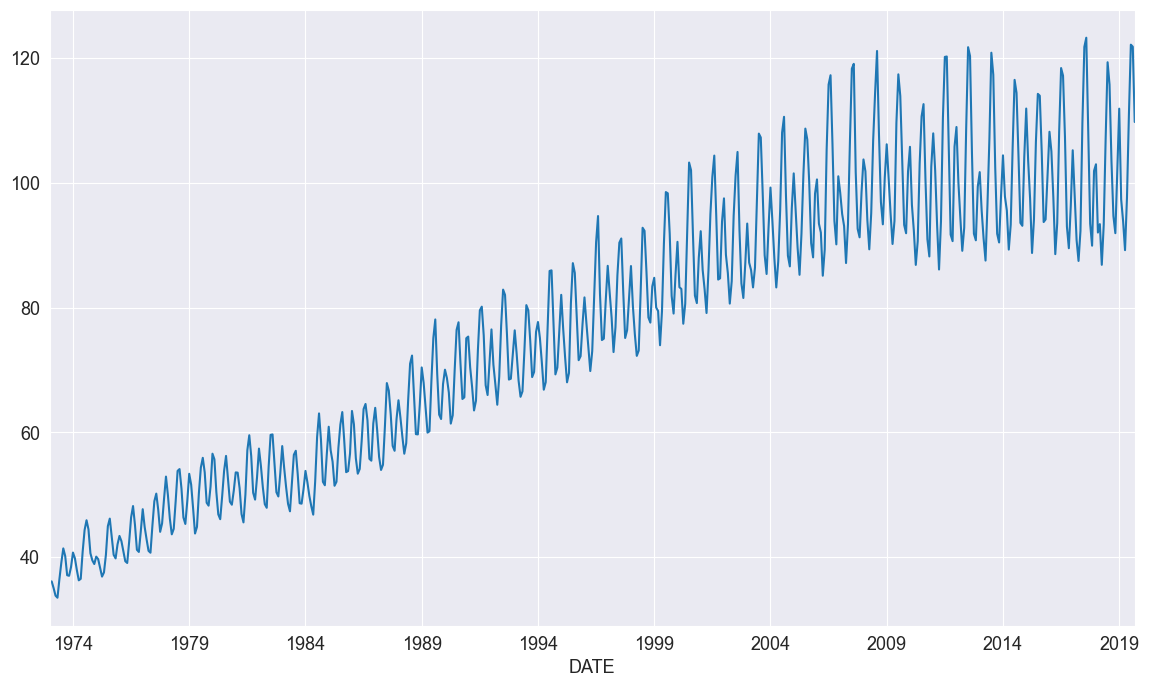

In [205]:

TW.plot(figsize = (14,8))

In [206]:
#checking the trend in the Timi series data

In [207]:
#Checking the treand in the time series data
pt=pd.pivot_table(data= electric,index = 'year',columns='month',values = 'Electricty_Consumption_in_TW')

<Axes: xlabel='year'>

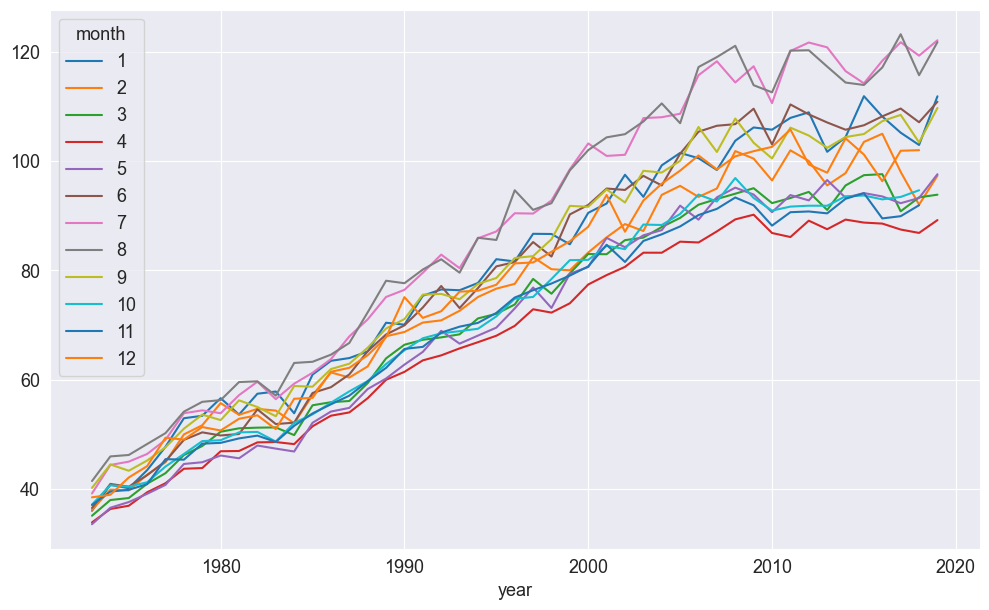

In [208]:
pt.plot(figsize = (12,7))

In [209]:
# checking seasonality in the time series data
sea = pd.pivot_table(data= electric,index = 'month',columns = 'year',values = 'Electricty_Consumption_in_TW')


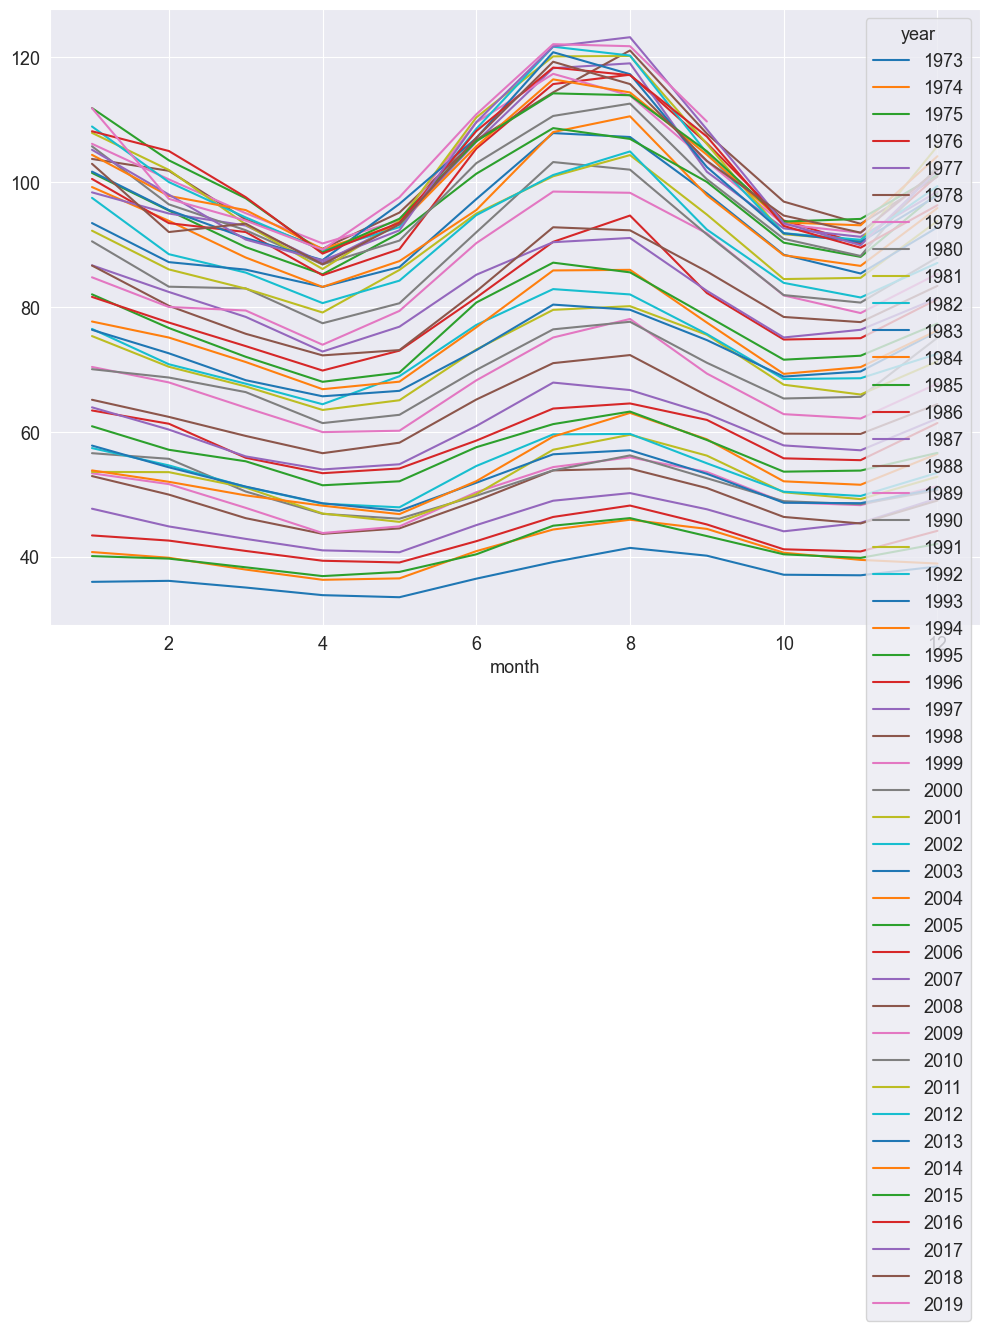

In [210]:
sea.plot(figsize = (12,8))
plt.show()

In [211]:
#using the Decomposition of the sereis data to work on the seasonality of data

In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [213]:
#we will use the multiplicative model

In [214]:
decom =seasonal_decompose(TW, model = 'multiplicative')

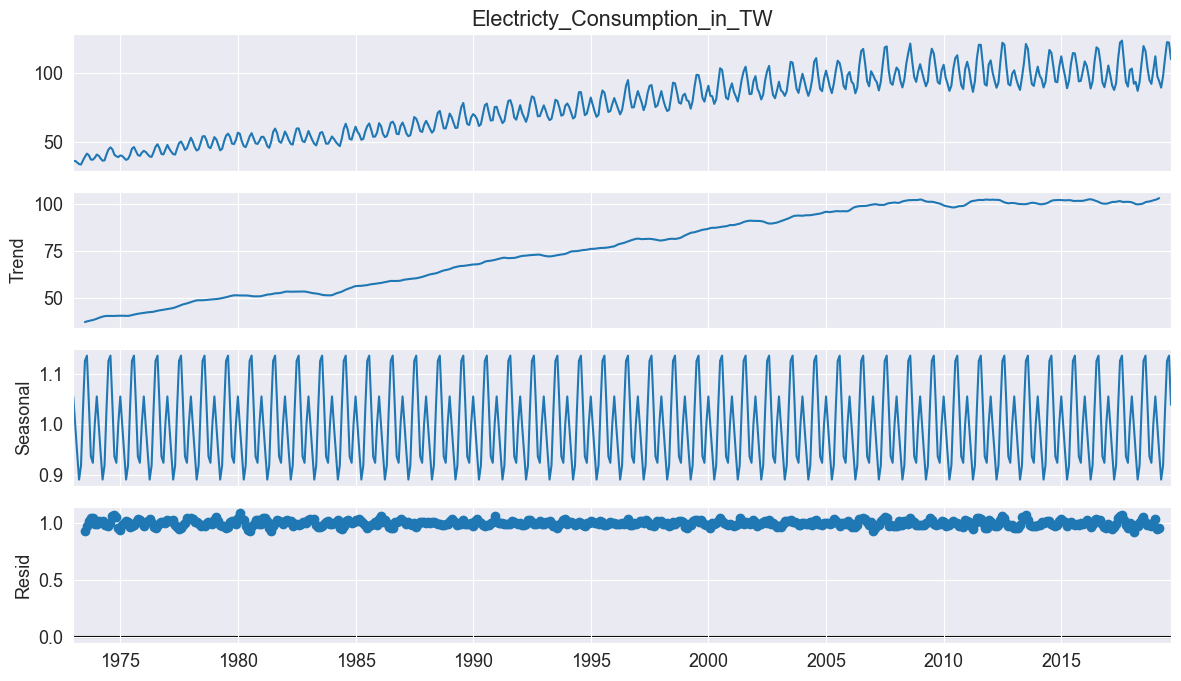

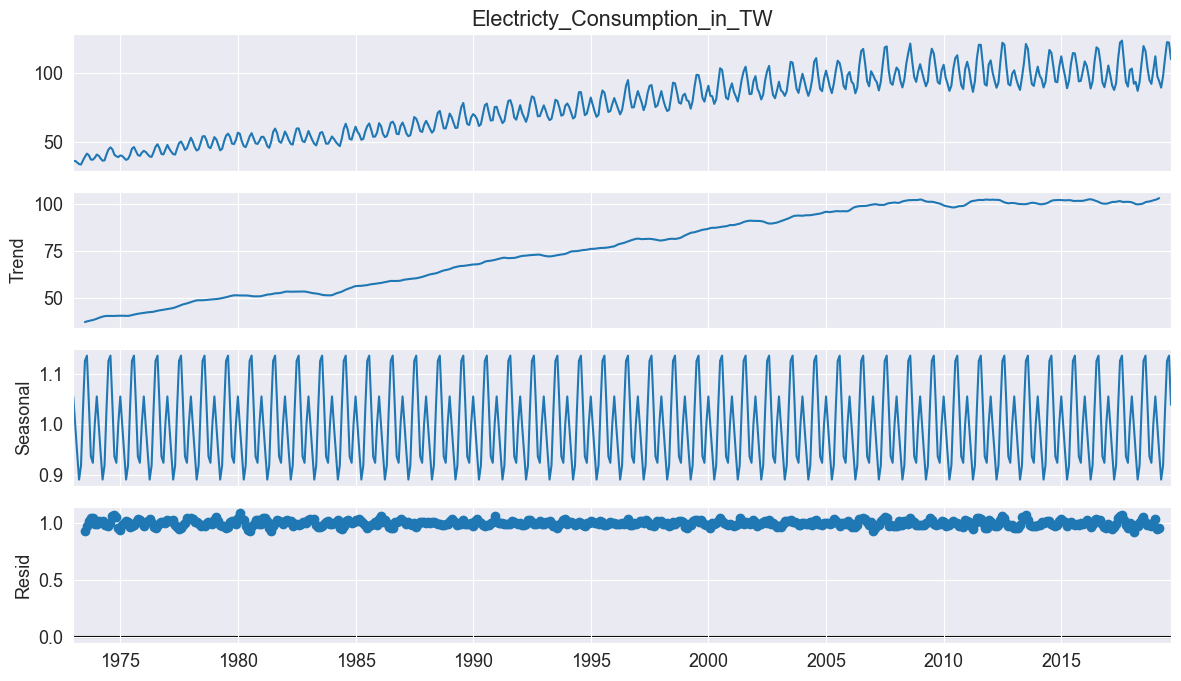

In [215]:
decom.plot()

In [216]:
decompose = pd.concat([decom.observed,decom.trend,decom.seasonal,decom.resid],axis=1)

In [217]:
decompose.columns = ['Actual','Trend','seaonality','Irregular']
decompose.head(30)

,Actual,Trend,seaonality,Irregular
DATE,,,,
1973-01-01,35.9728,NaN,1.055358,NaN
1973-02-01,36.1334,NaN,0.996086,NaN
1973-03-01,35.0625,NaN,0.945337,NaN
1973-04-01,33.8416,NaN,0.890877,NaN
1973-05-01,33.5107,NaN,0.918780,NaN
1973-06-01,36.4823,NaN,1.030843,NaN
1973-07-01,39.1412,37.223388,1.125749,0.934064
1973-08-01,41.4137,37.576442,1.136105,0.970085
1973-09-01,40.1639,37.850562,1.038776,1.021507


In [218]:
# seasnal - Trend decomposition using loess

In [219]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style('darkgrid')
plt.rc('figure',figsize =(12,7))
plt.rc('font',size = 13)

In [220]:
electric.describe()

,Electricty_Consumption_in_TW,year,month
count,561.000000,561.000000,561.000000
mean,76.681764,1995.877005,6.475936
std,22.756474,13.507968,3.448065
min,33.510700,1973.000000,1.000000
25%,55.919700,1984.000000,3.000000
50%,78.417000,1996.000000,6.000000
75%,93.840600,2008.000000,9.000000
max,123.216300,2019.000000,12.000000


In [221]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
 2   year                          561 non-null    int64         
 3   month                         561 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 21.9 KB


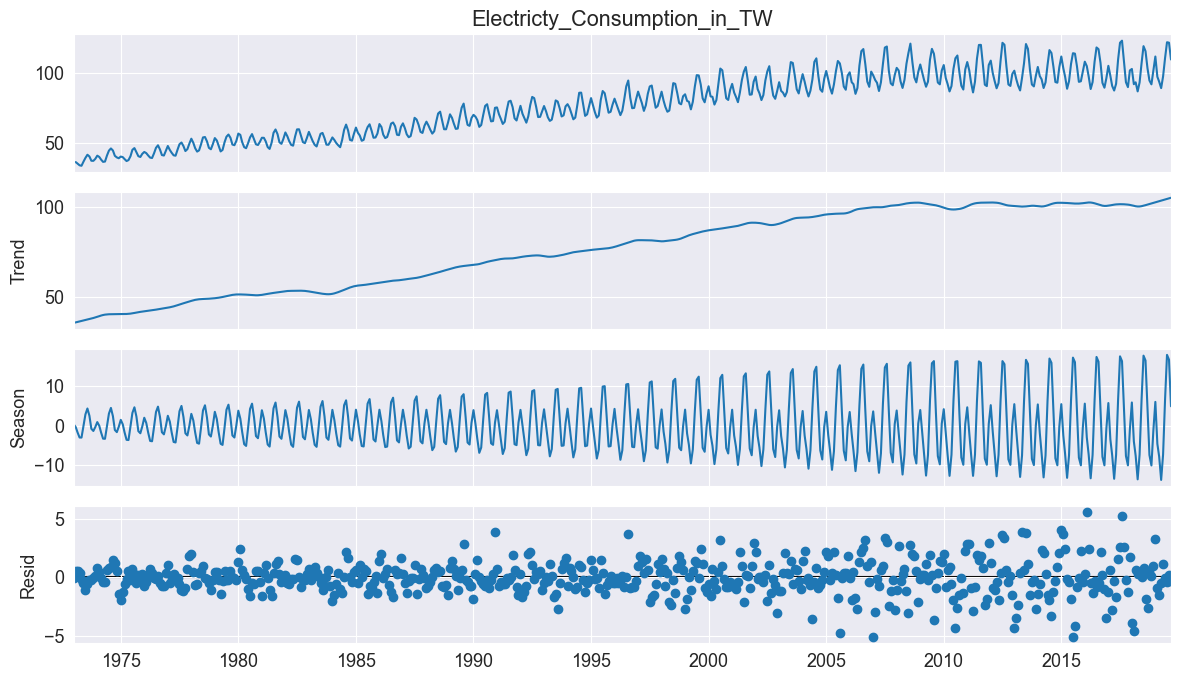

In [222]:
from statsmodels.tsa.seasonal import STL

stl  = STL(TW,seasonal=13)
res =stl.fit()
fig = res.plot()

In [223]:
# Train-Test split

In [224]:
electric.Electricty_Consumption_in_TW.tail(24)

DATE
2017-10-01     93.4264
2017-11-01     89.9026
2017-12-01    101.8836
2018-01-01    102.9398
2018-02-01     92.0095
2018-03-01     93.3526
2018-04-01     86.8386
2018-05-01     93.2361
2018-06-01    107.1009
2018-07-01    119.2874
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [225]:
train = electric.Electricty_Consumption_in_TW[:'2018-12-01 ']

In [226]:
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [227]:
test = electric.Electricty_Consumption_in_TW['2019-01-01':]

In [228]:
test

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [229]:
decom_train = seasonal_decompose(train,period=12)

In [230]:
decom_train.observed

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [231]:
decom_train.seasonal

DATE
1973-01-01     4.019862
1973-02-01    -0.598388
1973-03-01    -4.377311
1973-04-01    -8.666095
1973-05-01    -6.042497
                ...    
2018-08-01    10.747709
2018-09-01     2.913713
2018-10-01    -5.064766
2018-11-01    -6.086641
2018-12-01     0.116754
Name: seasonal, Length: 552, dtype: float64

<Axes: xlabel='DATE'>

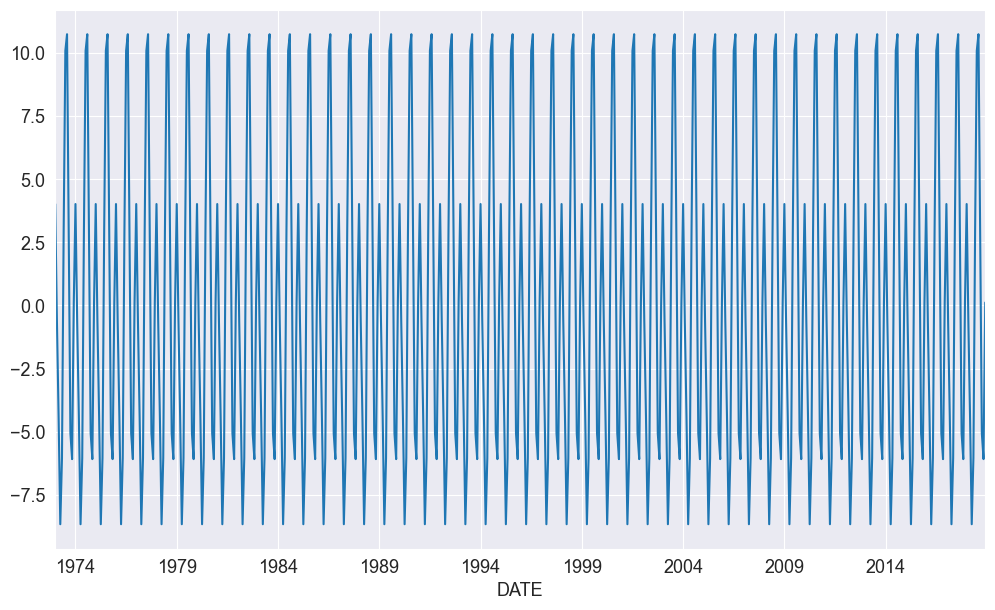

In [232]:
decom_train.seasonal.plot()

In [233]:
#ETS Model : Exponen Tial Smoothening
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [234]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [235]:
ets_model = ExponentialSmoothing(train, 
                                 trend = 'mul',
                                 seasonal = 'mul',
                                  seasonal_periods=12).fit(smoothing_level=0.1, # alpha
                                                          smoothing_slope = 0.6, # beta
                                                          smoothing_seasonal = 0.2) # gamma

In [236]:
ets_model.forecast(9)

2019-01-01    103.918087
2019-02-01     97.078842
2019-03-01     93.200485
2019-04-01     87.555415
2019-05-01     93.432318
2019-06-01    107.974969
2019-07-01    119.235748
2019-08-01    118.391808
2019-09-01    106.188999
Freq: MS, dtype: float64

In [237]:
test

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [238]:
np.abs(test.values - ets_model.forecast(9).values)/test.values

array([0.07093224, 0.00254051, 0.0068213 , 0.01829728, 0.04256433,
       0.02600652, 0.02346945, 0.02779429, 0.0321731 ])

In [239]:
print('mean_absolute_percentage_error :', np.mean(np.abs(test.values -ets_model.forecast(9).values)/test.values))

mean_absolute_percentage_error : 0.027844335804517267


In [240]:
# Building the SARIMA model to check the Accuracy and forecast the values for next two years on month by month basis


In [241]:
from statsmodels.tsa.stattools import acf,pacf_ols

In [242]:
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [243]:
acf(train)

array([1.        , 0.95743424, 0.8822484 , 0.83628089, 0.84918019,
       0.89402814, 0.91434806, 0.88415575, 0.83092541, 0.81075554,
       0.84838631, 0.91366489, 0.94348418, 0.9035457 , 0.83182738,
       0.78779538, 0.80146184, 0.84550757, 0.86542355, 0.83591452,
       0.78401768, 0.76352786, 0.79989273, 0.86219007, 0.89000845,
       0.8519554 , 0.78255803, 0.74002095])

In [244]:
len(acf(train))

28

In [245]:
acf(train)[:5]

array([1.        , 0.95743424, 0.8822484 , 0.83628089, 0.84918019])

In [246]:
import statsmodels.tsa.api as smt


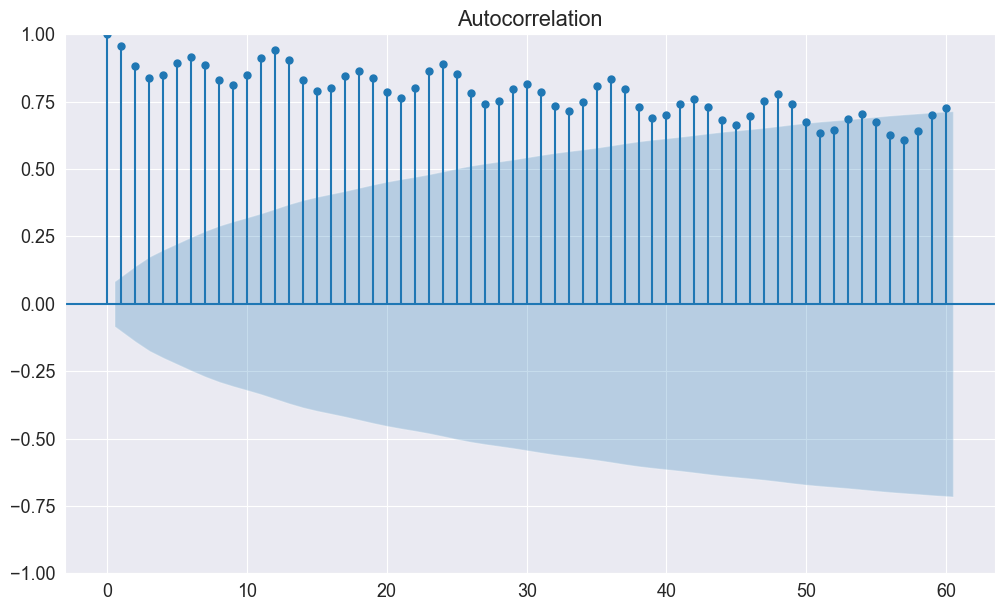

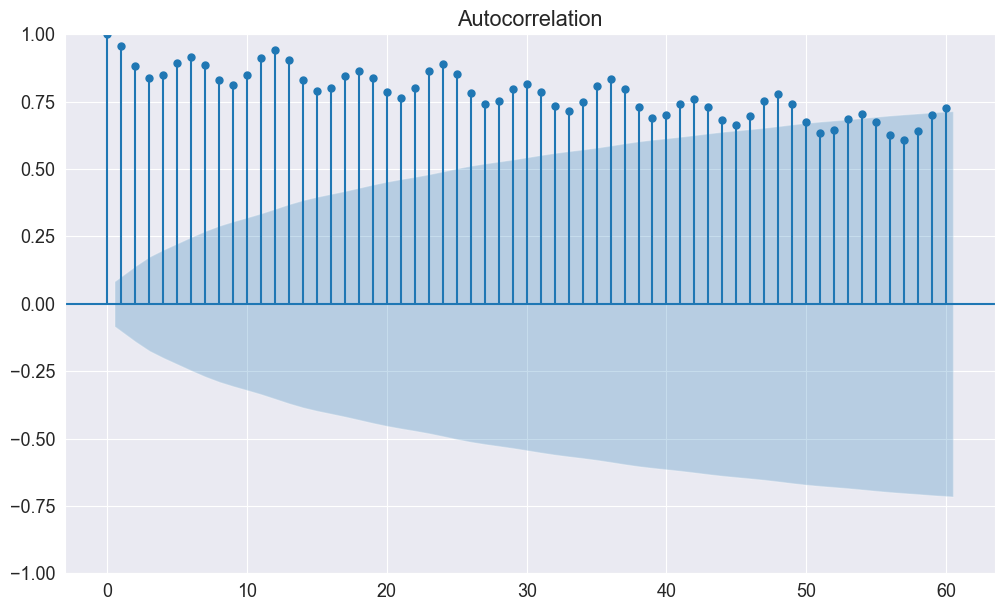

In [247]:
smt.graphics.plot_acf(train,lags = 60)

# Augmrnted Dickey Fuller Test
- Null hypothesis:Time Series data is not stationary
- Alternate hyothesis: Time Series data is stationary
- CI = 95%
- p-value = 0.05

In [248]:
# Dickey-fuller test can also help with finding whther my series is stationary of not
from statsmodels.tsa.stattools import adfuller
adfuller(train)

(-2.07020891309996,
 0.2566612036157738,
 15,
 536,
 {'1%': -3.442609129942274,
  '5%': -2.866947348175723,
  '10%': -2.569649926626197},
 2241.1266401841767)

In [249]:
#p-value is high .25 means we cannot reject the null hypothesis - Time Series is not Stationary.
# Given p value here is 0.25 it means that our series is not stationary
# we would perform log transformation

In [250]:
train_log = np.log(train)
adfuller(train_log)

(-3.177976418799614,
 0.021295410072371367,
 15,
 536,
 {'1%': -3.442609129942274,
  '5%': -2.866947348175723,
  '10%': -2.569649926626197},
 -2480.0754859254694)

In [251]:
#p-value=0.021 is less then 0.05,now we can reject the null hypothesis,our data has become stationay 

In [252]:
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [253]:
train_log

DATE
1973-01-01    3.582763
1973-02-01    3.587218
1973-03-01    3.557132
1973-04-01    3.521691
1973-05-01    3.511865
                ...   
2018-08-01    4.751094
2018-09-01    4.638673
2018-10-01    4.550177
2018-11-01    4.520787
2018-12-01    4.624858
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

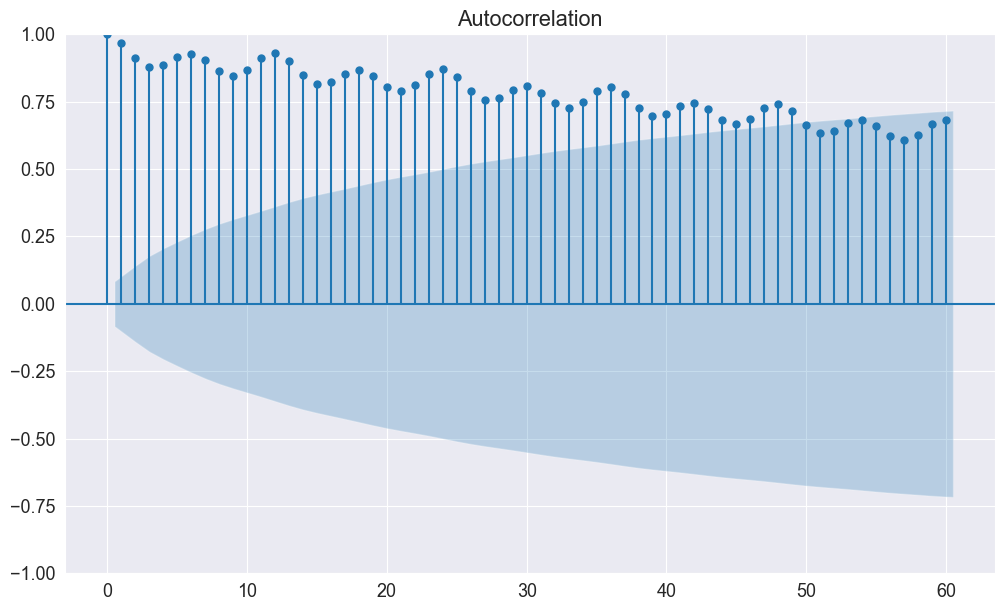

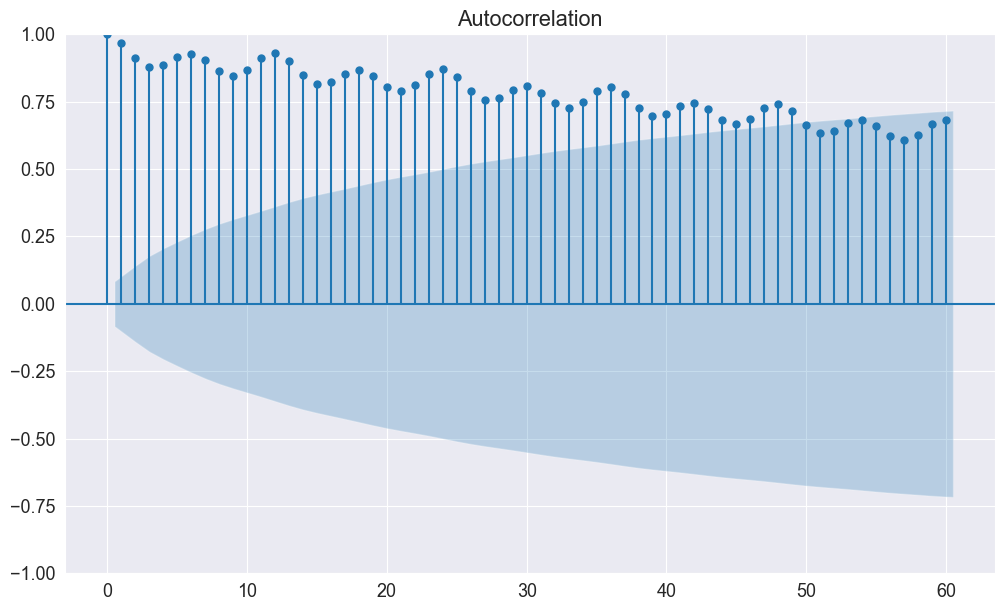

In [254]:
smt.graphics.plot_acf(stationary_series,lags = 60)

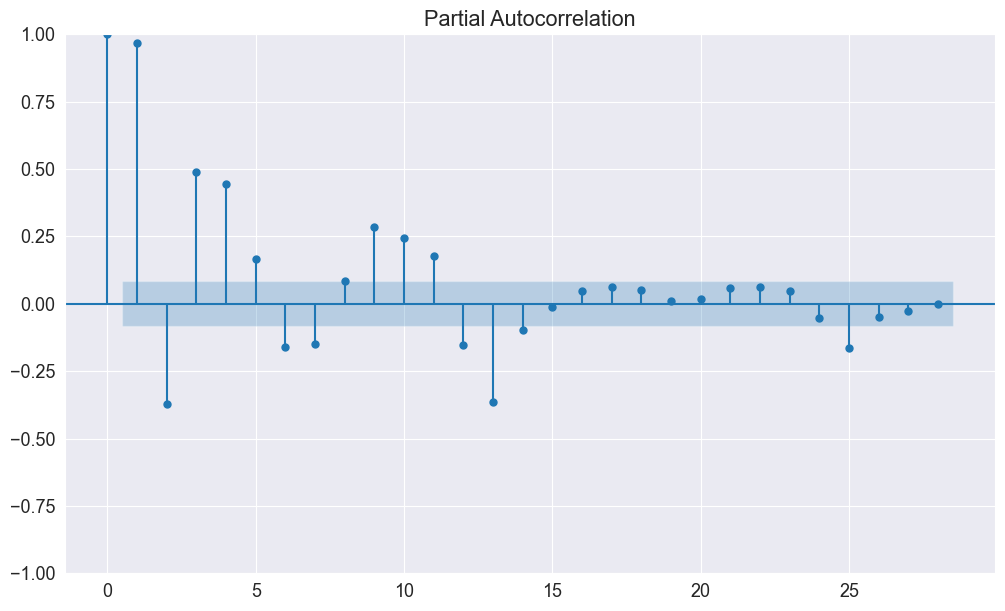

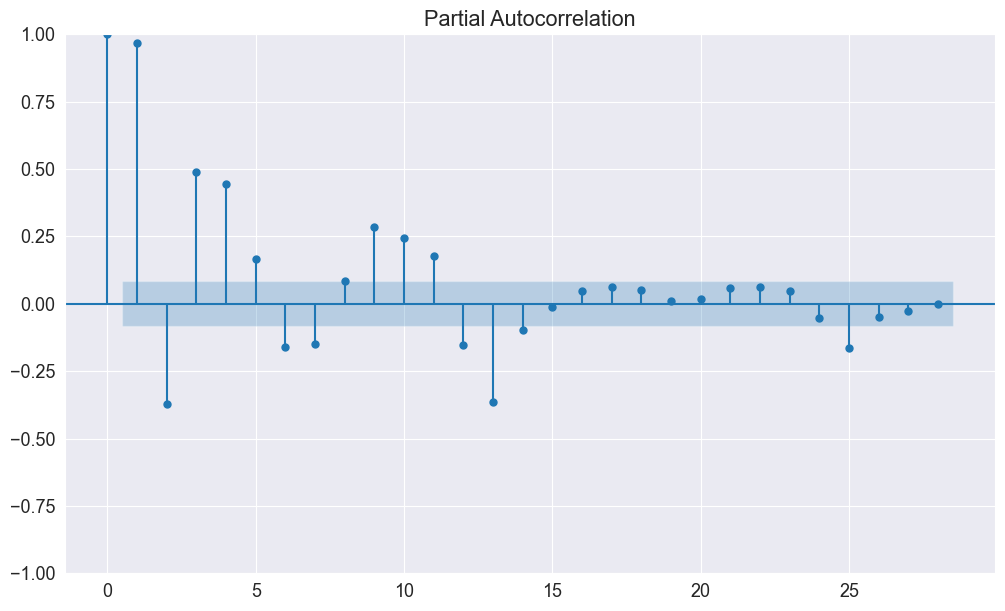

In [255]:
smt.graphics.plot_pacf(train_log)

In [256]:
# value of d =0
# value of p and value of q =1
# seasonal compenet = 12

In [257]:
import statsmodels.api as sm

In [258]:
state_model = sm.tsa.statespace.SARIMAX(train_log,order=(1,0,1),seasonal_order=(1,0,1,12),
                                       enforce_stationary=False,
                                       enforce_invertibility = False).fit()

In [259]:
print(state_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  552
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                1305.227
Date:                            Fri, 28 Jun 2024   AIC                          -2600.455
Time:                                    09:36:51   BIC                          -2578.887
Sample:                                01-01-1973   HQIC                         -2592.028
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.002    483.814      0.000       0.994       1.002
ma.L1         -0.1582      0.040   

In [260]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
stlf = STLForecast(train,ARIMA,model_kwargs={'order':(1,0,1)})
res = stlf.fit()
forecasts = res.forecast(33)

In [261]:
forecasts

2019-01-01    104.067980
2019-02-01     95.158153
2019-03-01     92.692861
2019-04-01     87.032420
2019-05-01     92.840925
2019-06-01    108.610515
2019-07-01    120.828502
2019-08-01    119.433101
2019-09-01    106.382166
2019-10-01     94.771116
2019-11-01     91.309250
2019-12-01    101.853421
2020-01-01    103.903419
2020-02-01     94.993679
2020-03-01     92.528474
2020-04-01     86.868119
2020-05-01     92.676712
2020-06-01    108.446388
2020-07-01    120.664461
2020-08-01    119.269146
2020-09-01    106.218299
2020-10-01     94.607335
2020-11-01     91.145555
2020-12-01    101.689812
2021-01-01    103.739897
2021-02-01     94.830243
2021-03-01     92.365124
2021-04-01     86.704856
2021-05-01     92.513534
2021-06-01    108.283297
2021-07-01    120.501456
2021-08-01    119.106227
2021-09-01    106.055465
Freq: MS, dtype: float64

In [262]:
# pridiction of electricity consumption in next two years
forecasts.tail(24)

2019-10-01     94.771116
2019-11-01     91.309250
2019-12-01    101.853421
2020-01-01    103.903419
2020-02-01     94.993679
2020-03-01     92.528474
2020-04-01     86.868119
2020-05-01     92.676712
2020-06-01    108.446388
2020-07-01    120.664461
2020-08-01    119.269146
2020-09-01    106.218299
2020-10-01     94.607335
2020-11-01     91.145555
2020-12-01    101.689812
2021-01-01    103.739897
2021-02-01     94.830243
2021-03-01     92.365124
2021-04-01     86.704856
2021-05-01     92.513534
2021-06-01    108.283297
2021-07-01    120.501456
2021-08-01    119.106227
2021-09-01    106.055465
Freq: MS, dtype: float64

In [263]:
stlf = STLForecast(train,ARIMA,model_kwargs=dict(order=(1,0,1),trend='t'))
stlf_res = stlf.fit()

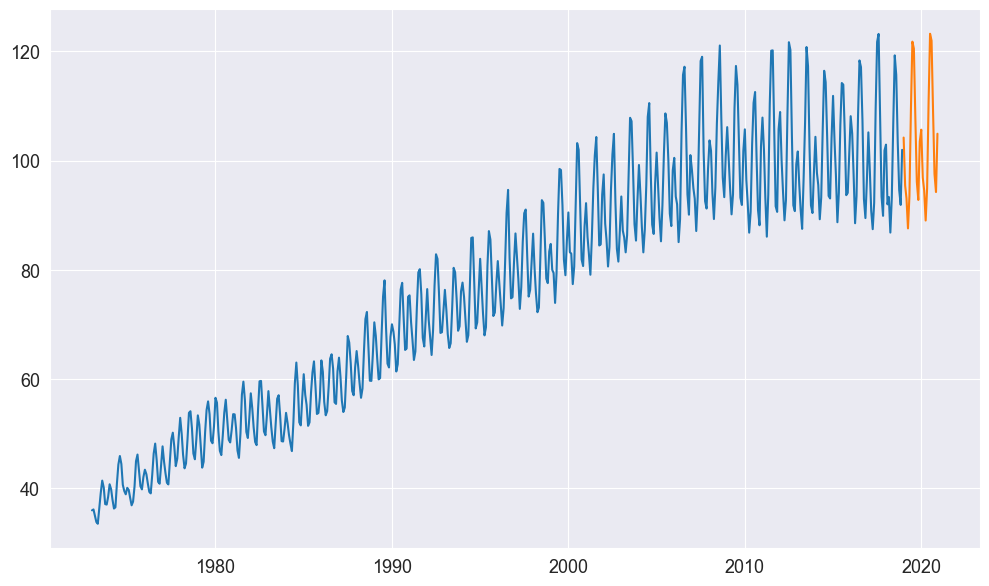

In [264]:
forecast =stlf_res.forecast(24)
plt.plot(train)
plt.plot(forecast)
plt.show()